In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score

from sklearn.preprocessing import label_binarize

from fwi_predict.constants import TIMEZONE, WQ_RANGES
from fwi_predict.wq import get_in_required_range

sys.path.append("..")
from scripts.clean_ara_measurements import column_map

In [2]:
jun_dec_samples = pd.read_excel("../data/raw/Testing Data Jun-Dec 2024.xls")
jun_dec_results = pd.read_csv("../output/trial/testing_data_jun_dec_results.csv").drop(columns='Unnamed: 0')

In [3]:
jun_dec_samples['sample_idx'] = pd.Series(range(len(jun_dec_samples)))
jun_dec_samples = jun_dec_samples.rename(columns=column_map).rename(columns={'DO (mg/L)': 'do_mg_per_L', 'Turbidity (in cm)': 'turbidity_cm', 'Is follow up': 'follow_up'})

In [4]:
# Remove follow up visits
jun_dec_samples = jun_dec_samples[jun_dec_samples['follow_up'] == 'No']

In [5]:
jun_dec_samples['sample_dt'] = pd.to_datetime(
	jun_dec_samples['Date of data collection'].dt.strftime('%Y-%m-%d') + ' ' + 
	jun_dec_samples['Time of data collection'].astype(str)
)
jun_dec_samples['sample_dt'] = jun_dec_samples['sample_dt'].dt.tz_localize(TIMEZONE)

In [6]:
jun_dec_samples = jun_dec_samples[['sample_idx', 'sample_dt', 'do_mg_per_L', 'turbidity_cm', 'ph', 'ammonia_mg_per_L', 'pond_id']]

In [7]:
jun_dec_samples['morning'] = jun_dec_samples['sample_dt'].dt.hour < 12
jun_dec_samples['time_of_day'] = jun_dec_samples['morning'].apply(lambda x: 'morning' if x else 'evening')
for param in WQ_RANGES.keys():
  range_name = param.split('_')[0] + '_in_range'
  jun_dec_samples[range_name] = get_in_required_range(param, jun_dec_samples[param], jun_dec_samples['time_of_day'])

jun_dec_samples = jun_dec_samples.drop(columns=['morning', 'time_of_day'])

In [8]:
combined = jun_dec_samples.merge(jun_dec_results.drop(columns=['sample_dt', 'pond_id']), on='sample_idx')

c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

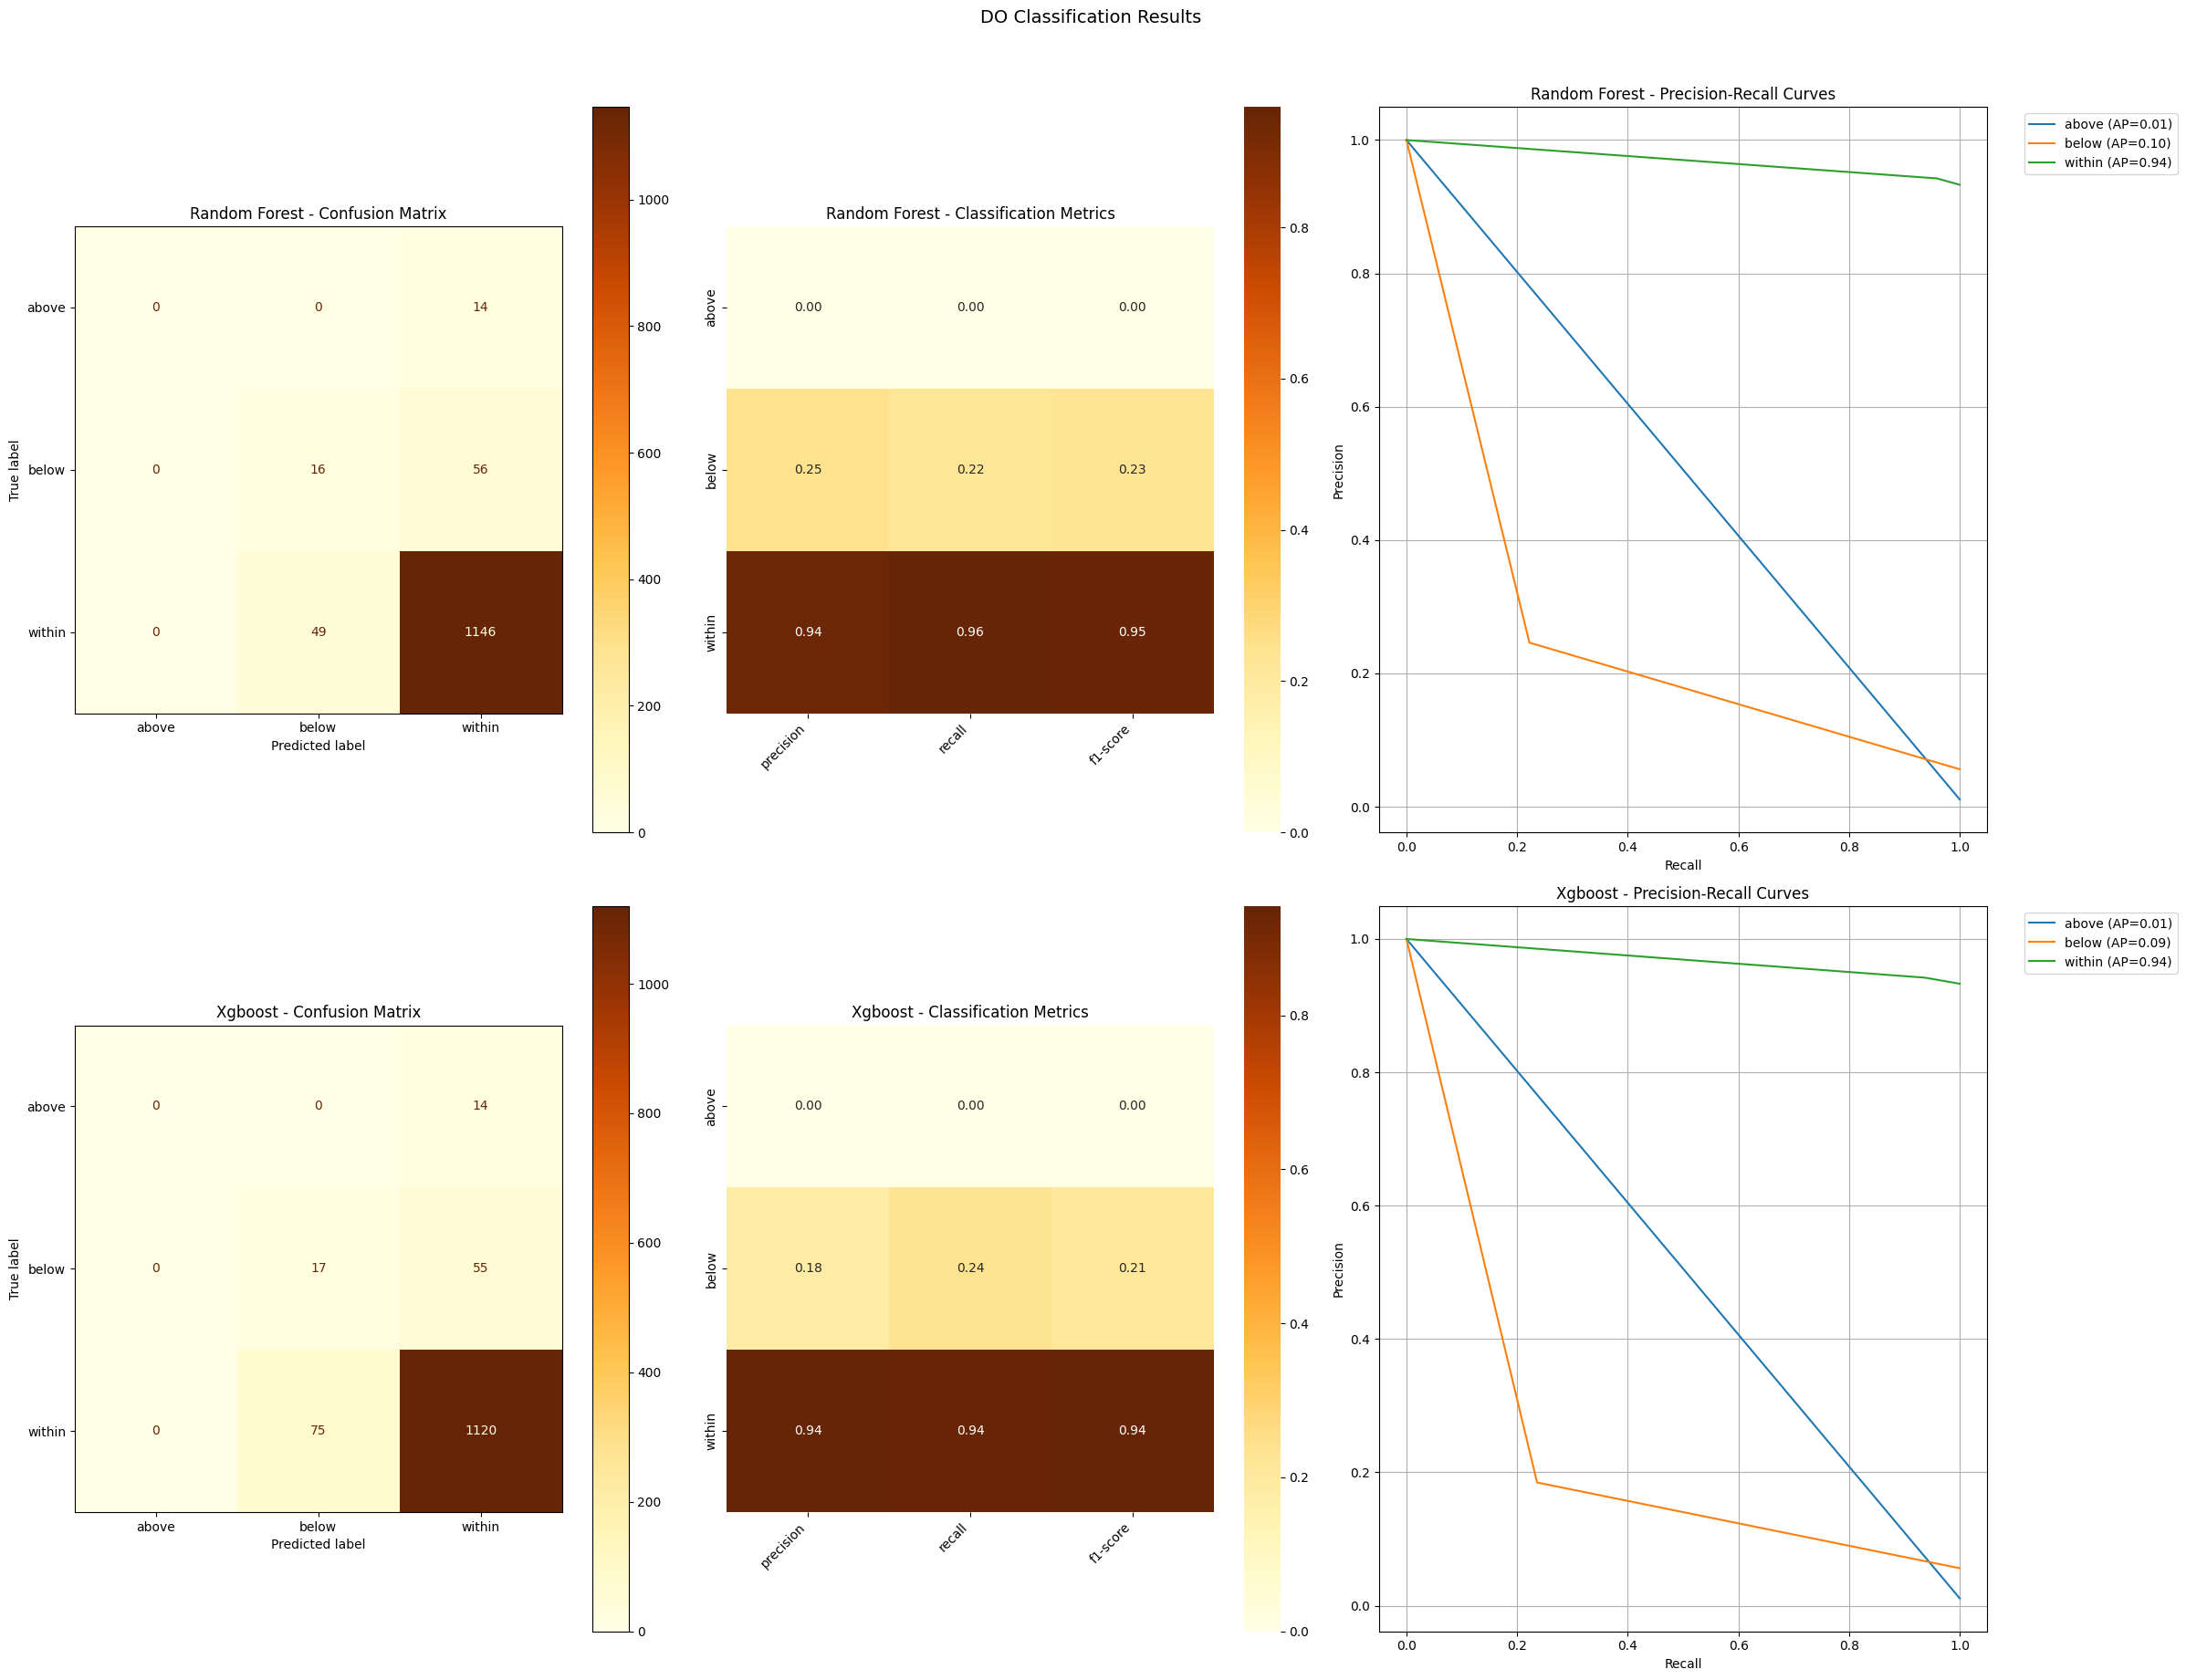

c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

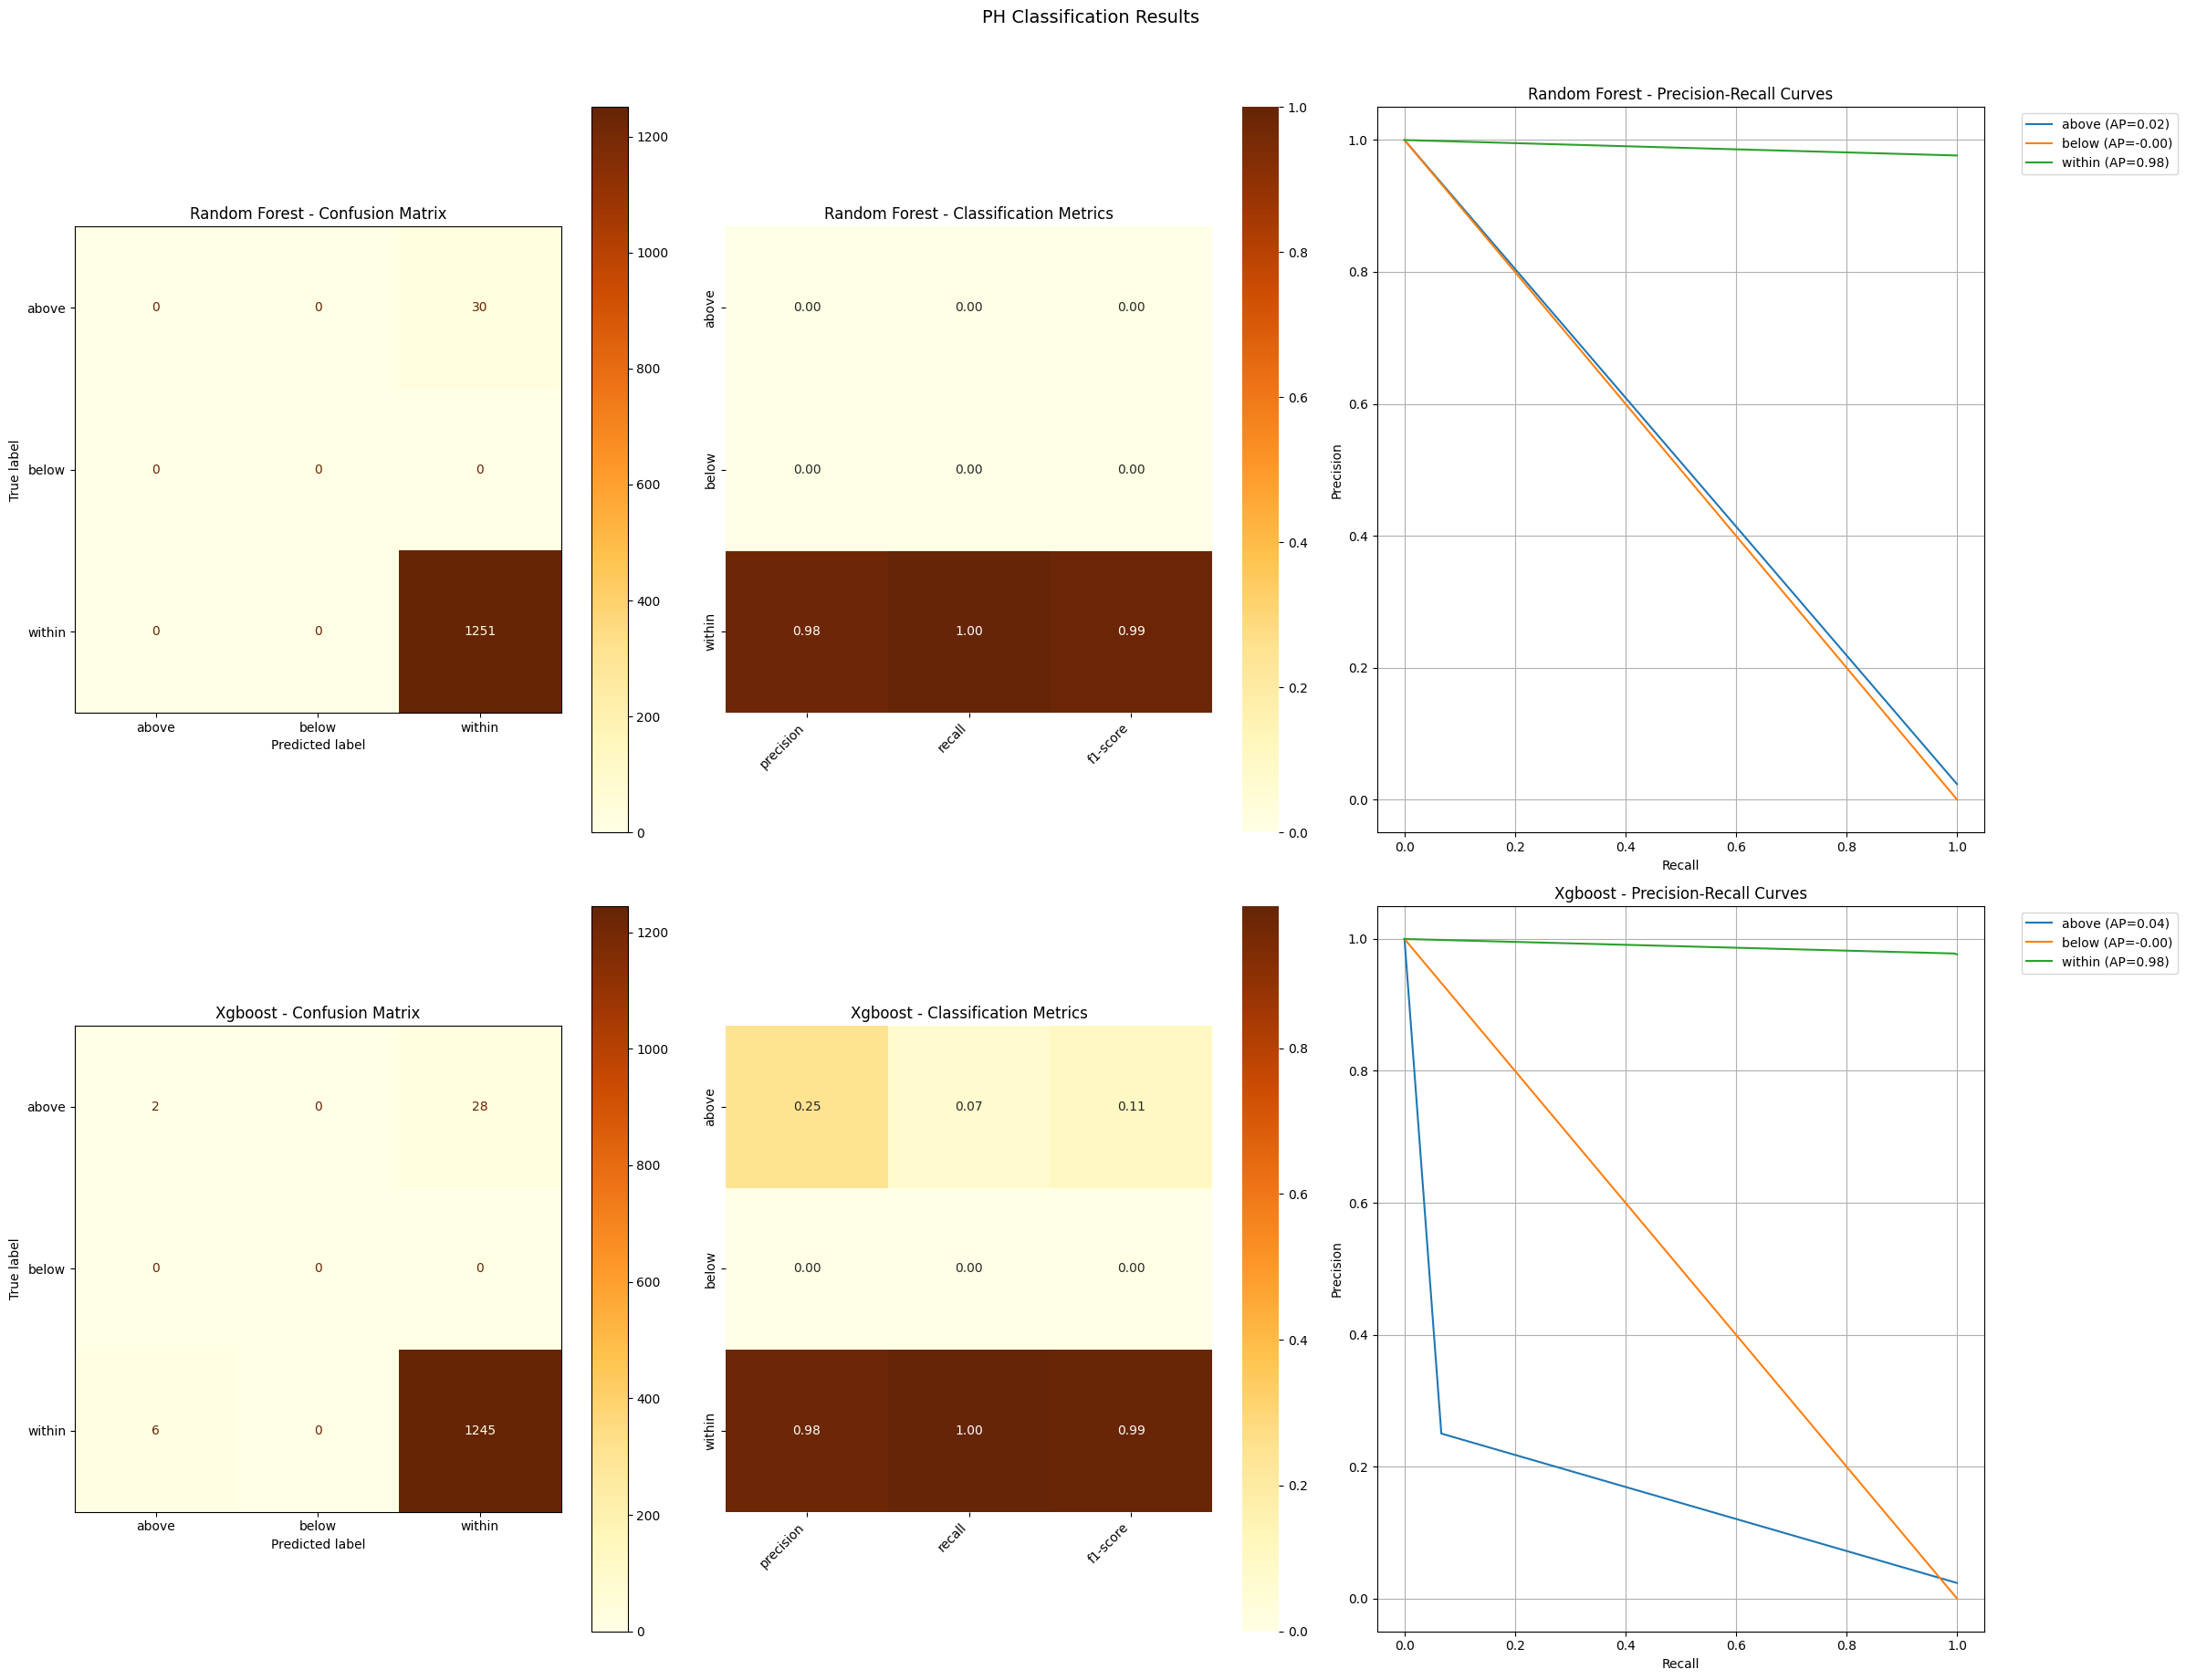

c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

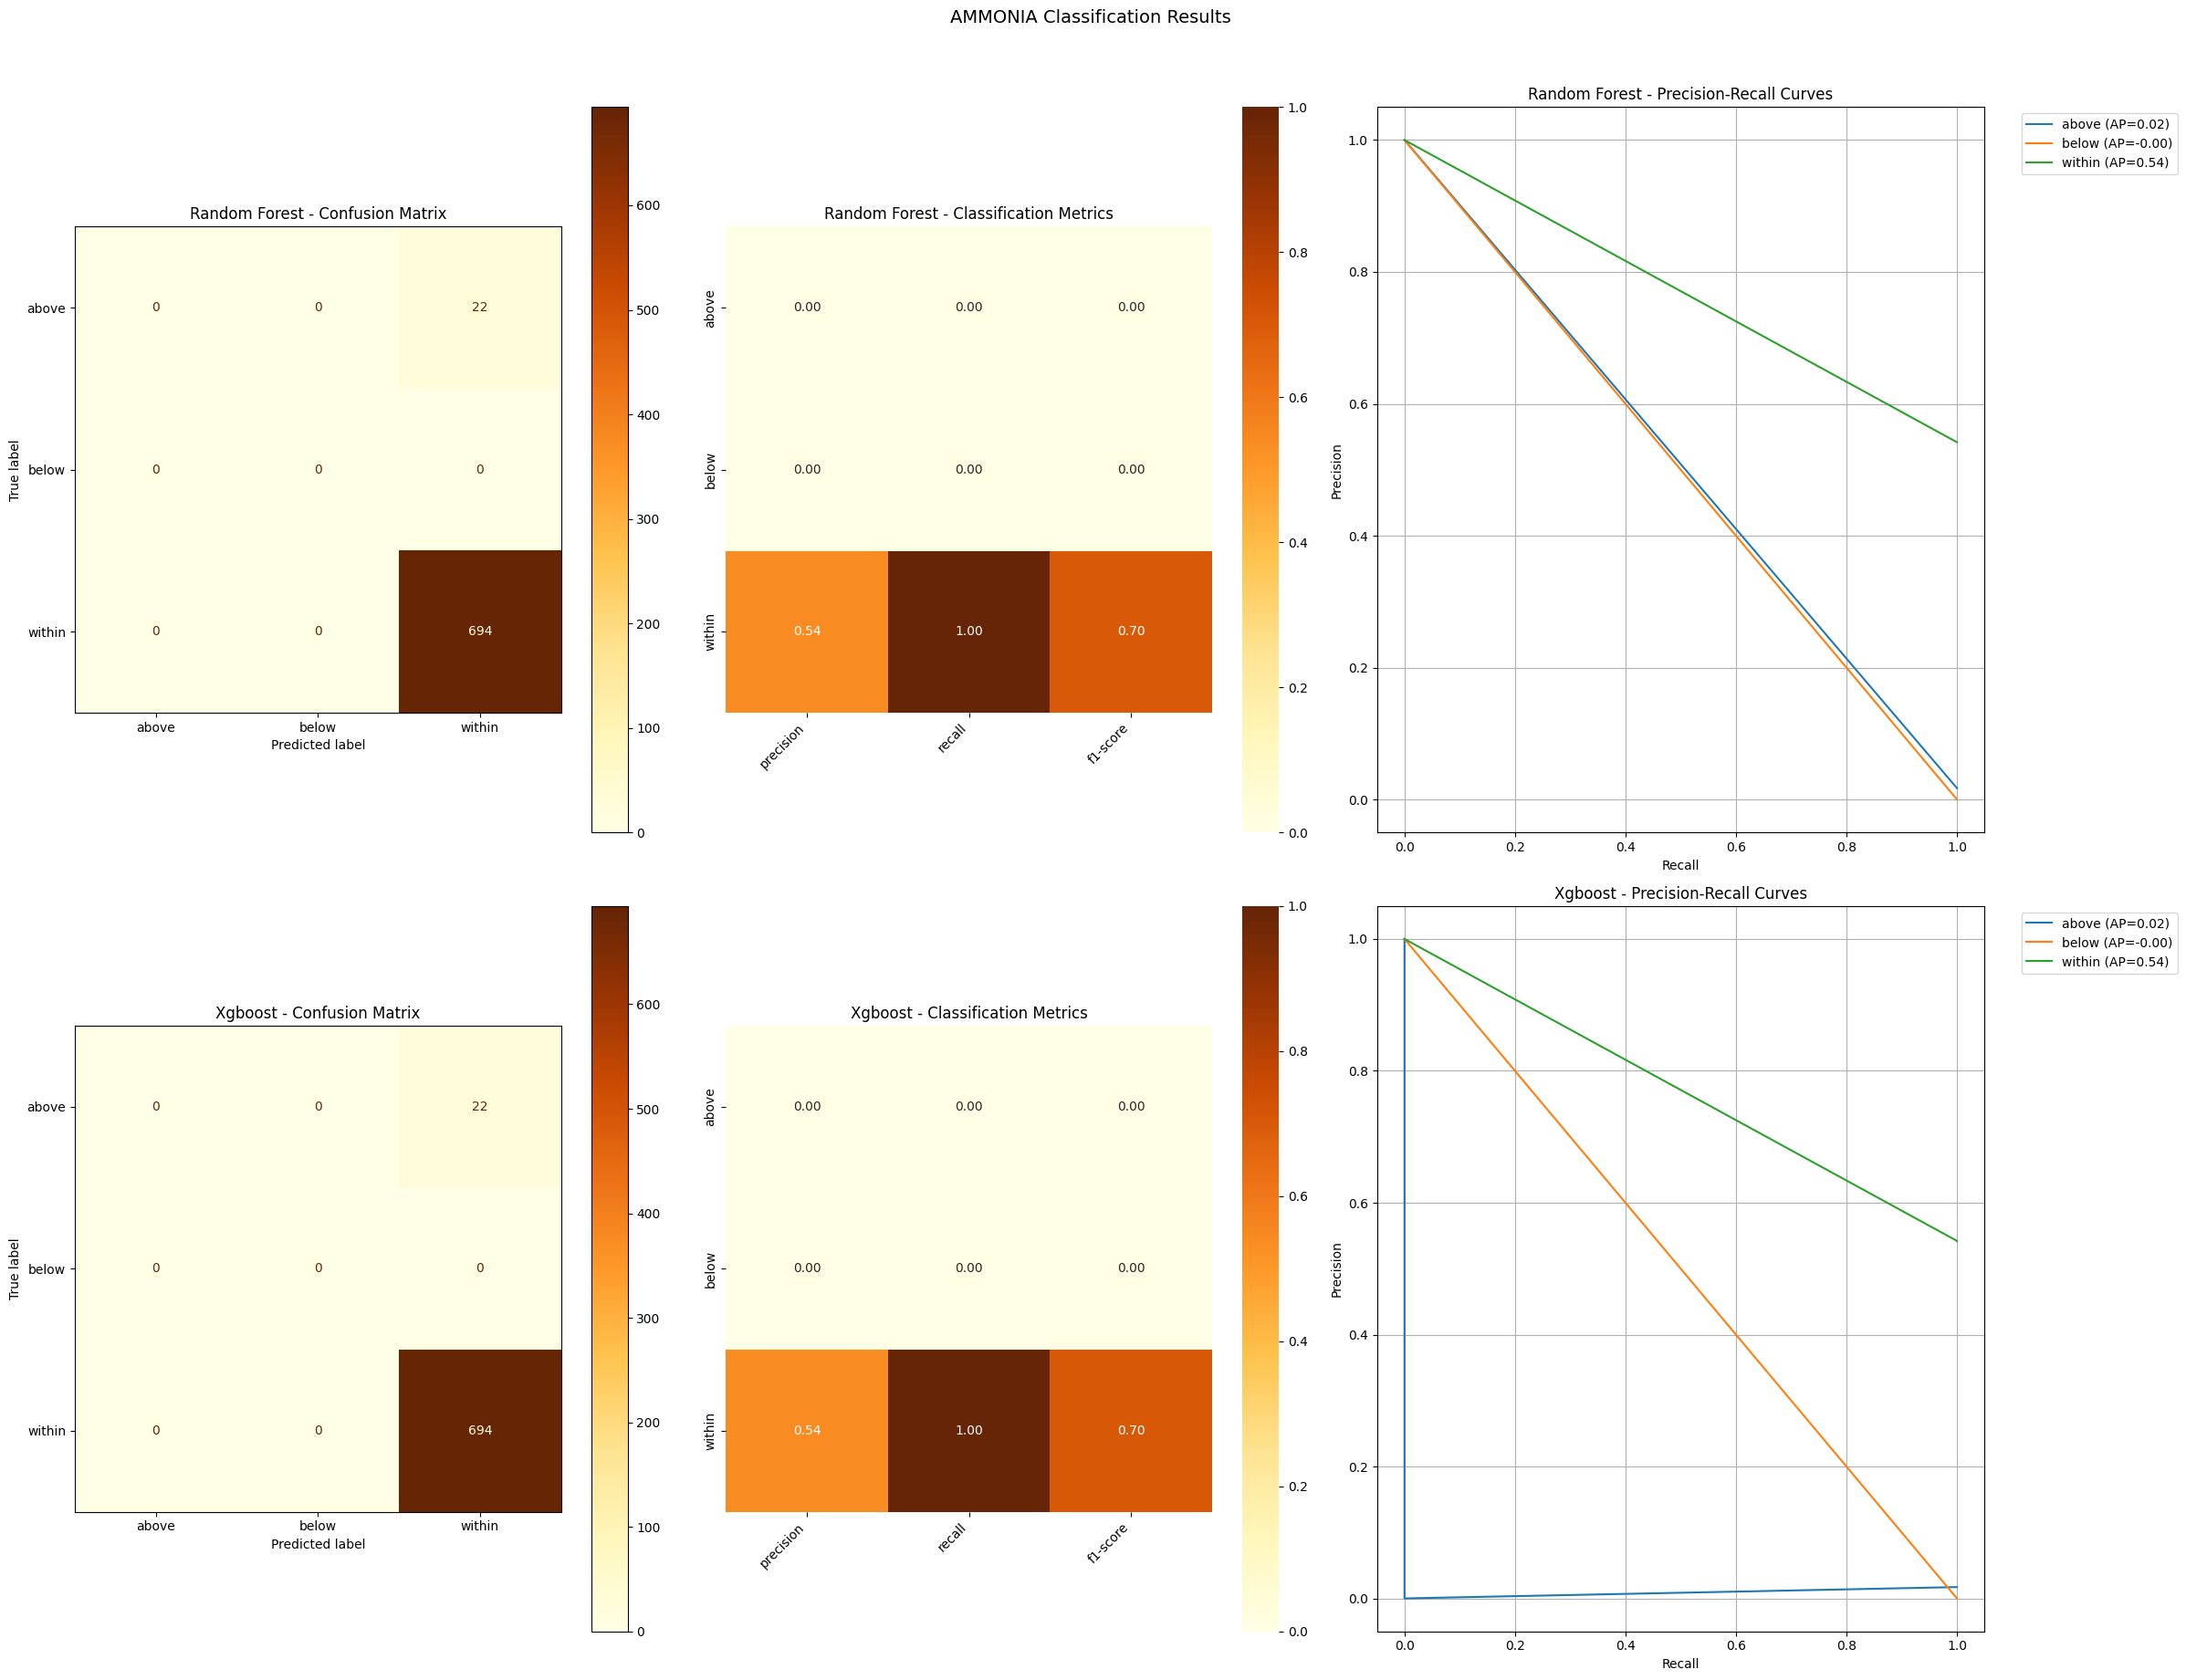

c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\squaade\Documents\Github\fwi-predict\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

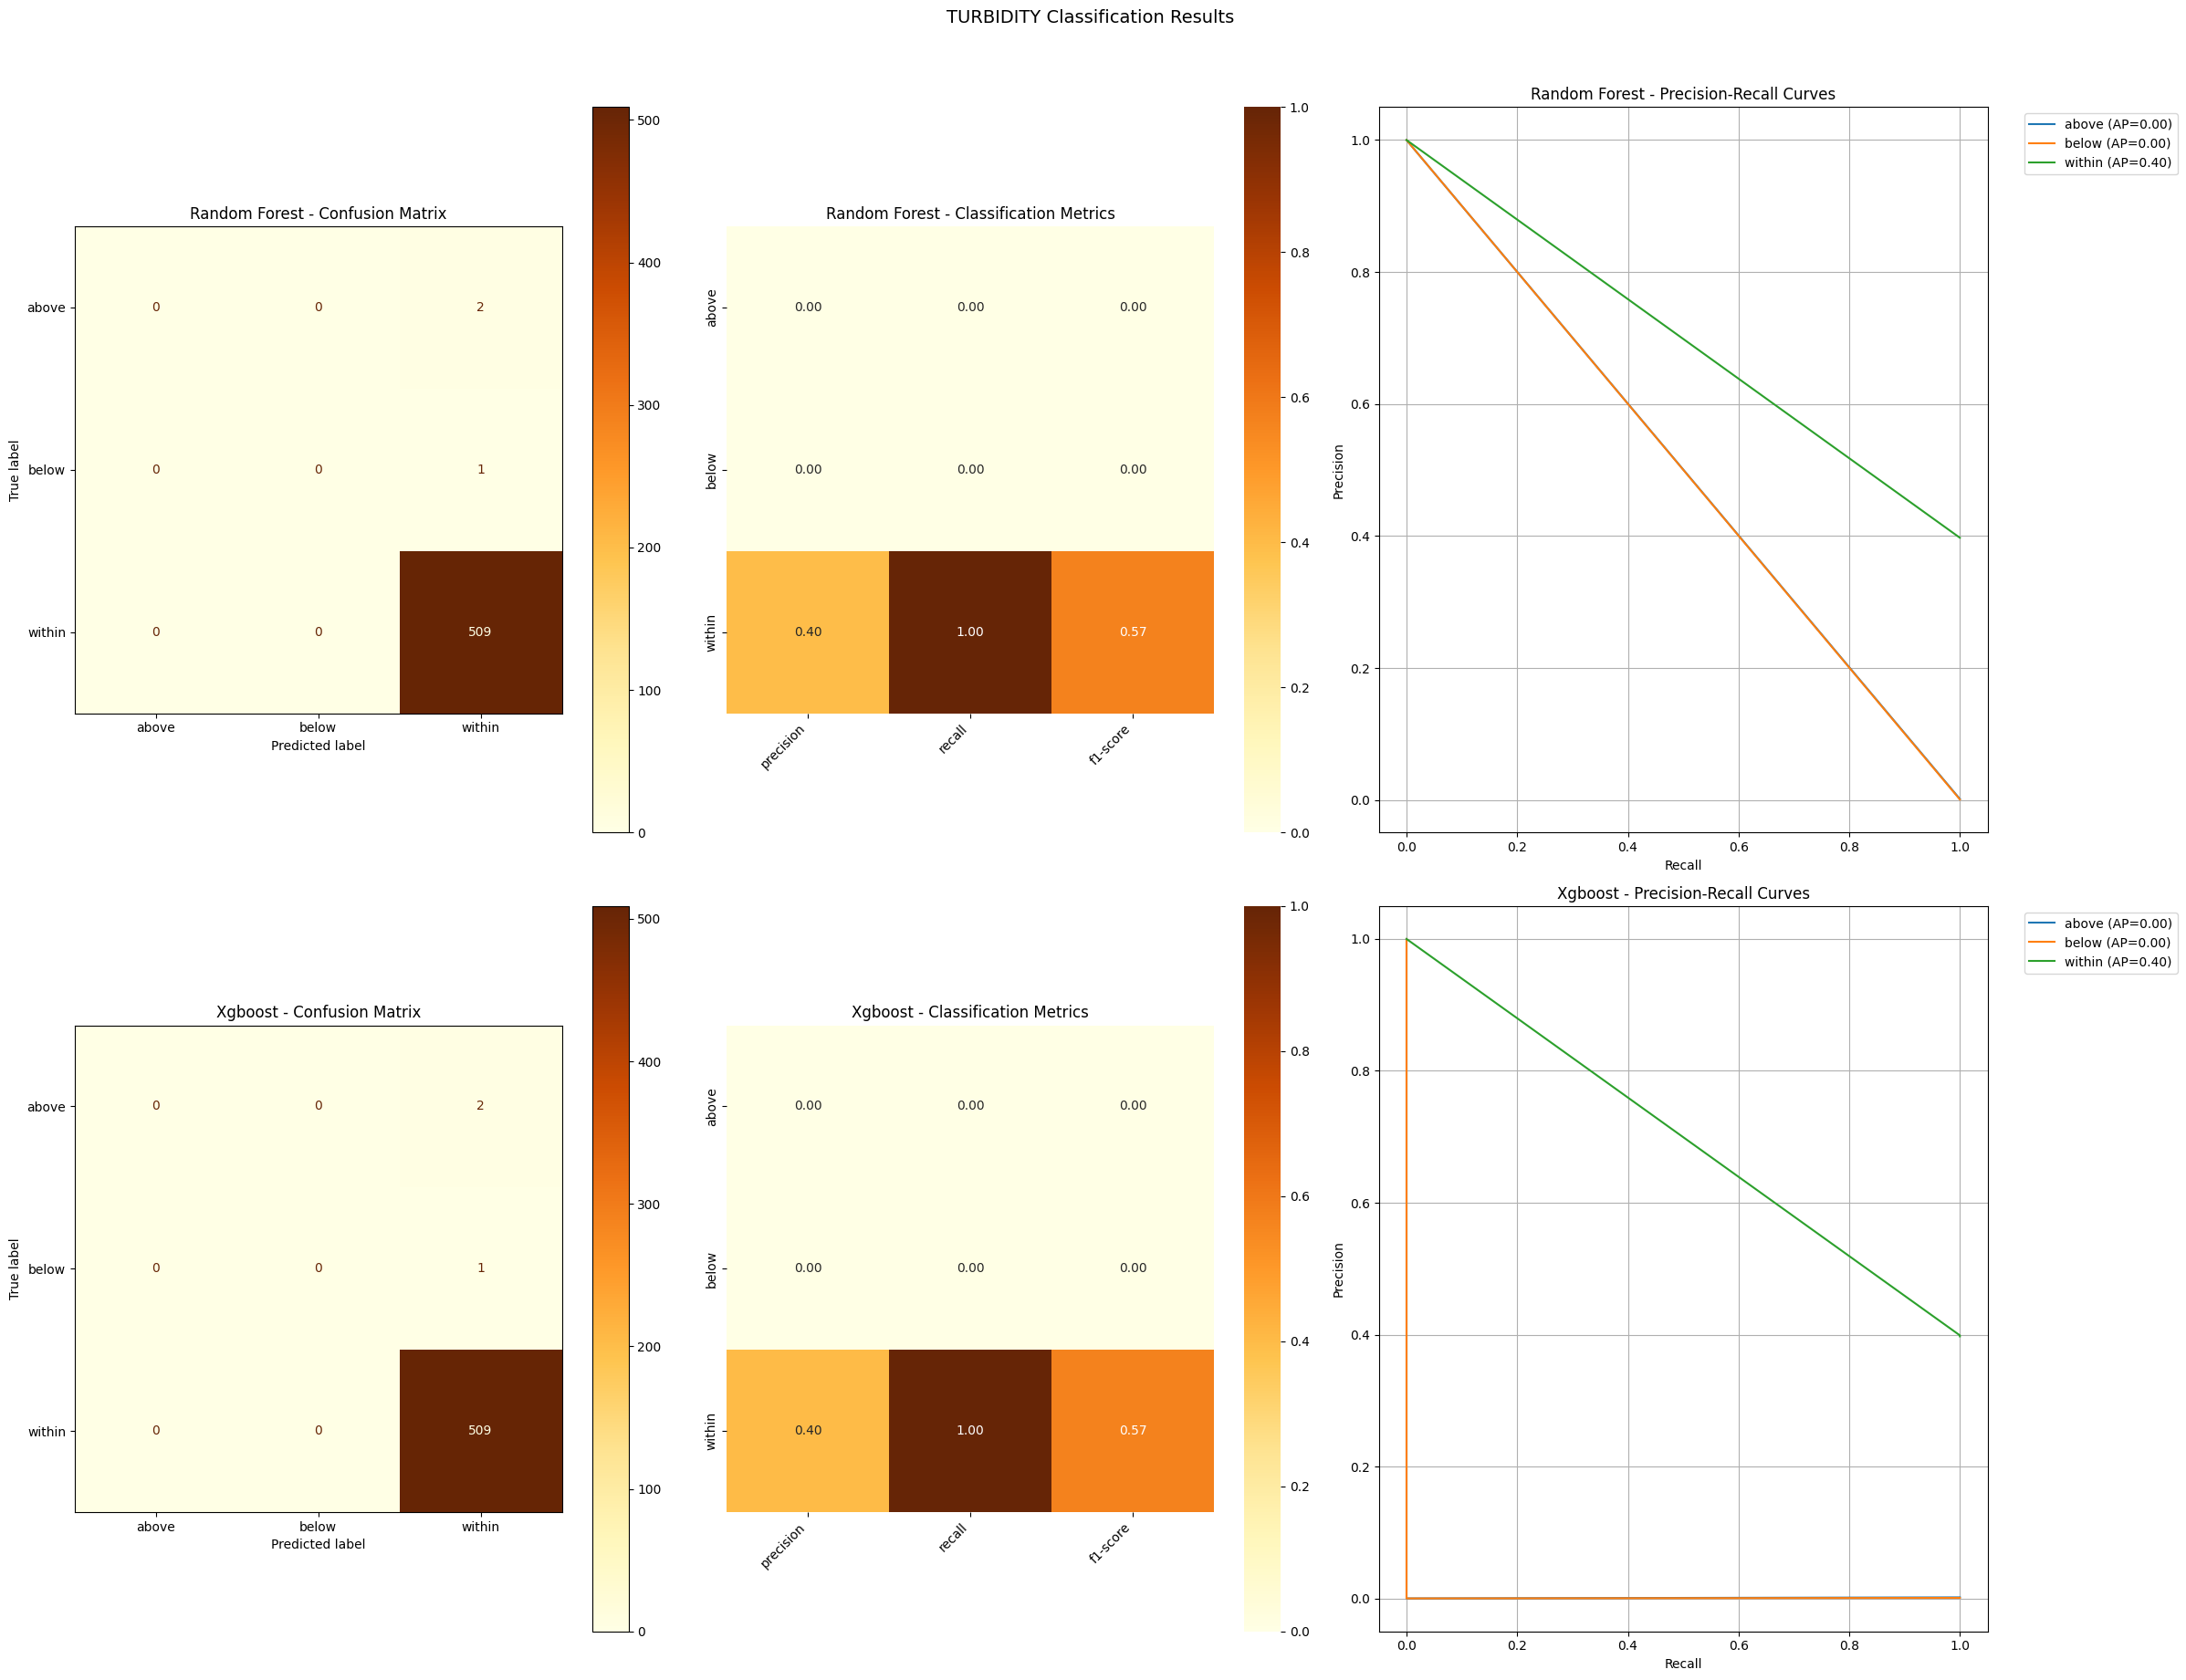

In [11]:
# Set up figure size and style
plt.style.use('default')
yellow_brick_colors = ['#E6B89C', '#EAD2AC', '#9CAFB7']

# Parameters to evaluate
params = ['do', 'ph', 'ammonia', 'turbidity']
models = ['random_forest', 'xgboost']

for param in params:
    # Create figure with a 3x3 grid - models in rows, metrics in columns
    fig = plt.figure(figsize=(24, 18))
    gs = fig.add_gridspec(len(models), 3, height_ratios=[1] * len(models), width_ratios=[1, 1, 1])
    
    fig.suptitle(f'{param.upper()} Classification Results', fontsize=14, y=1.02)
    
    # Get actual values
    y_true = combined[f'{param}_in_range']
    
    # Plot results for each model
    for idx, model in enumerate(models):
        y_pred = combined[f'{param}_in_range_pred_{model}']
        compare_idx = y_true.notna() & y_pred.notna()
        
        # Confusion Matrix (first column)
        ax_cm = fig.add_subplot(gs[idx, 0])
        cm = confusion_matrix(y_true[compare_idx], y_pred[compare_idx], labels=['above', 'below', 'within'])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['above', 'below', 'within'])
        disp.plot(ax=ax_cm, values_format='d', cmap=sns.color_palette("YlOrBr", as_cmap=True))
        ax_cm.set_title(f'{model.replace("_", " ").title()} - Confusion Matrix')
        
        # Classification Report (middle column)
        ax_metrics = fig.add_subplot(gs[idx, 1])
        report = classification_report(y_true[compare_idx], y_pred[compare_idx],
                                    output_dict=True, labels=['above', 'below', 'within'])
        
        # Convert classification report to matrix for heatmap
        metrics = ['precision', 'recall', 'f1-score']
        classes = ['above', 'below', 'within']
        report_matrix = np.array([[report[class_name][metric] for metric in metrics] for class_name in classes])
        
        # Create heatmap of classification report
        sns.heatmap(report_matrix, annot=True, fmt='.2f',
                    cmap='YlOrBr', xticklabels=metrics,
                    yticklabels=classes, ax=ax_metrics,
                    square=True)
        ax_metrics.set_title(f'{model.replace("_", " ").title()} - Classification Metrics')
        ax_metrics.set_xticklabels(ax_metrics.get_xticklabels(), rotation=45, ha='right')
        
        # Precision-Recall curves (third column)
        ax_pr = fig.add_subplot(gs[idx, 2])
        y_true_bin = label_binarize(y_true[compare_idx], classes=['above', 'below', 'within'])
        y_pred_bin = label_binarize(y_pred[compare_idx], classes=['above', 'below', 'within'])
        
        for i, class_name in enumerate(classes):
            precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
            avg_precision = average_precision_score(y_true_bin[:, i], y_pred_bin[:, i])
            
            ax_pr.plot(recall, precision, 
                      label=f'{class_name} (AP={avg_precision:.2f})')
    
        ax_pr.set_xlabel('Recall')
        ax_pr.set_ylabel('Precision')
        ax_pr.set_title(f'{model.replace("_", " ").title()} - Precision-Recall Curves')
        ax_pr.grid(True)
        ax_pr.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
